In [1]:
import MultiPoint as mp
import propagator 

## Example 1: Two point

This example shows how to use propagators.  First create a propagator object and then pass it to the integral you would like calculate.  When you create a propagator it will calculate the eigenvalues and residues and stuff like that so you don't need to do it over and over again when you are doing integrals.

In [2]:
nlam=3  # how many lam values you want
d=3
mu=0
K=1.2345

name = 'the k=1.2345, mu=0 propagator'
myprop = propagator.propagator(name,K,mu,nlam=nlam)
# myprop is an object that includes things like eigenvalues and residues

N=2.3456
lam0=0
lam=0
fa=0.5

# calculate the two point intigral (without the factor of 2)
# this is a single perumation
intigral = mp.IAAresum(N,fa,lam0,lam,myprop)
print(intigral)

(1.32340514016-6.58487563664e-49j)


We have just calculated the following integral
$$
Integral=\int_{0}^{Nf_A}\int_{0}^{s_{2}}\mathcal{G}_{\lambda_{0}\lambda}^{\mu}\left(N,K\right)
$$

In [3]:
# now we can get another N, lam0, lam values
N=3.456
lam0=0
lam=1
intigral = mp.IAAresum(N,fa,lam0,lam,myprop)
print(intigral)

(1.46198219566e-54+0.57935293849j)


## Example 2: Four point

\[
\underset{AABB}{I_{1,2,3}^{\left(4\right)}\left(N\right)}=\int_{Nf_{A}}^{N}ds_{3}\int_{Nf_{A}}^{s_{4}}ds_{2}\int_{0}^{Nf_{A}}ds_{1}\int_{0}^{s_{1}}ds_{0}\mathcal{G}_{\lambda0_{1}\lambda_{1}}^{\mu_{1}}\left(s_{4}-s_{3},K_{1}\right)\mathcal{G}_{\lambda0_{2}\lambda_{2}}^{\mu_{2}}\left(s_{3}-s_{2},K_{2}\right)\mathcal{G}_{\lambda0_{3}\lambda_{3}}^{\mu_{3}}\left(s_{2}-s_{1},K_{2}\right)
\]

In [4]:
# Let's do the same thing for 4 point AABB for example
mu=0
K=0.0
name = 'the k=0, mu=0 propagator'
prop2 = propagator.propagator(name,K,mu,nlam=nlam)

mu=0
K=1.2345
name = 'prop3'
prop3 = propagator.propagator(name,K,mu,nlam=nlam)

lam0_1=0; lam_1=0;
lam0_2=0; lam_2=0;
lam0_3=0; lam_3=0;

I3=mp.IAABBresum(N,fa,lam0_1,lam_1,lam0_2,lam_2,lam0_3,lam_3,\
           myprop,prop2,prop3)
print(I3)

(7.73119042316-2.14615936267e-55j)


## Example 3: 4 point Many K values

The point of this example is to show how to create many propagators.
In general you will want a different propagator for each set of K and mu values.  You can use the same propagator do calculate integrals for different values of lam0,lam,N, and fa.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
nlam=5
ORDEig=25
d=3
mu=0

nkpts=100
K=np.logspace(-2,5,nkpts)
props1=[] # list of propagators at each K
props2=[] # list of propagators at each K
props3=[] # list of propagators at each K
for ii in range(0,nkpts):

    name=ii
    props1.append( propagator.propagator(name,1.0*K[ii],mu,nlam=nlam) )

    name=ii+0.5
    props2.append( propagator.propagator(name,K[ii],mu,nlam=nlam) )
    
    name=ii+0.25
    props3.append( propagator.propagator(name,1.0*K[ii],mu,nlam=nlam) )

In [7]:
N=[0.001,0.01,0.1,1.0,10,100,1000]
ana=np.zeros((nkpts,len(N)),dtype=type(1+1j))
dub=np.zeros((nkpts,len(N)),dtype=type(1+1j))
#fa=0.4466
fa=1.0

lam0_1=0; lam_1=0;
lam0_2=0; lam_2=0;
lam0_3=0; lam_3=0;

for ii in range(0,nkpts):    
    for nn in range(0,len(N)):
        ana[ii,nn]=mp.IAAAAresum(N[nn],fa,\
                                 lam0_1,lam_1,\
                                 lam0_2,lam_2,\
                                 lam0_3,lam_3,\
                                 props1[ii],props2[ii],props3[ii])
        #dub[ii,nn]=IAAAAexplicit(N[nn],lam0,lam,\
        #           props1[ii],props2[ii],props3[ii])

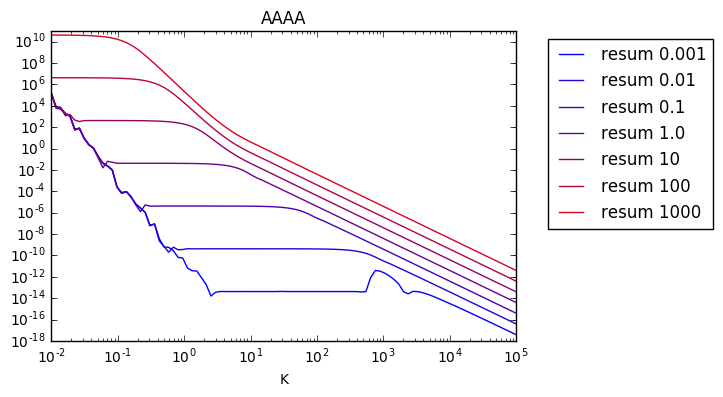

In [8]:
fig, ax = plt.subplots()
for ii in range(0,len(N)):
    col=float(ii)/len(N)
    ax.loglog(K.real,abs(ana[:,ii]).real,\
                color=[col, 0.0, 1-col],label='resum '+str(N[ii]))
    #ax.loglog(K.real,abs(dub[:,ii]),'--',\
    #            color=[col, 0.0, 1-col],label='expl '+str(N[ii]))
ax.legend(bbox_to_anchor=(1.05,1),loc=2)
ax.set_xlabel('K')
ax.set_title('AAAA')
#ax.set_ylim([10**-18,10**15])
plt.show()